In [4]:
import pylevin as levin
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.special import spherical_jn, jv
from scipy import integrate


x_length = 100
N = 2
y = np.linspace(1,2, N) 
x = np.geomspace(1e-5,100,x_length) #define support
f_of_x = x[:,None]**(3*y[None,:]) + (x**2 +x)[:, None] #define integrands f(x) 

integral_type = 2
N_thread = 1 # Number of threads used for hyperthreading
logx = True # Tells the code to create a logarithmic spline in x for f(x)
logy = True # Tells the code to create a logarithmic spline in y for y = f(x)
lp_double = levin.pylevin(integral_type, x, f_of_x, logx, logy, N_thread) #Constructor of the class

n_sub = 6 #number of collocation points in each bisection
n_bisec_max = 32 #maximum number of bisections used
rel_acc = 1e-4 #relative accuracy target
boost_bessel = True #should the bessel functions be calculated with boost instead of GSL, higher accuracy at high Bessel orders
verbose = True #should the code talk to you?
lp_double.set_levin(n_sub, n_bisec_max, rel_acc, boost_bessel, verbose)

M = 1000
k = np.geomspace(1e-2,1000,M)
ell_1 = (5*np.ones_like(k)).astype(int)
ell_2 = (10*np.ones_like(k)).astype(int)
result_levin = np.zeros((M, N)) #allocate the result
quad_result = np.zeros_like(result_levin)


t0 = time.time()
lp_double.levin_integrate_bessel_double(x[0]*np.ones_like(k),x[-1]*np.ones_like(k),k,k,ell_1,ell_2, False, result_levin)
print("Levin took", time.time() -t0, "s")

t0 = time.time()
lp_double.levin_integrate_bessel_double(x[0]*np.ones_like(k),x[-1]*np.ones_like(k),k,k,ell_1,ell_2, False, result_levin)
print("Levin took", time.time() -t0, "s")

t0 = time.time()
lp_double.levin_integrate_bessel_double(x[0]*np.ones_like(k),x[-1]*np.ones_like(k),k,k,ell_1,ell_2, False, result_levin)
print("Levin took", time.time() -t0, "s")


t0 = time.time()
for k_i, k_val in enumerate(k):
    for i_integral in range(N):
        integrand_quad = lambda xquad: ((xquad**(3*y[i_integral]) + xquad**2 + xquad)*spherical_jn(ell_1[0],k_val*xquad) * spherical_jn(ell_2[0],k_val*xquad))
        quad_result[k_i, i_integral] = integrate.quad(integrand_quad, x[0], x[-1], epsabs=0, epsrel = 1e-4, limit = 1000)[0]
print("Quadrature took", time.time() -t0, "s")



Levin took 0.2431943416595459 s
Levin took 0.11400389671325684 s
Levin took 0.012146949768066406 s
0.01
0.010115911122238298
0.01023316578330245
0.010351779556301762
0.010471768194855203
0.0105931476351837
0.010715933998226712
0.01084014359178331
0.010965792912678098
0.011092898648952227
0.011221477682079803
0.01135154708920999
0.011483124145435111
0.011616226326085019
0.011750871309048075
0.011887076977119033
0.012024861420374122
0.01216424293857368
0.012305240043592616
0.012447871461879062
0.012592156136941509
0.012738113231864785
0.01288576213185518
0.01303512244681509
0.013186214013947485
0.013339056900390587
0.013493671405883065
0.013650078065460139
0.013808297652180923
0.013968351179887397
0.014130259905995337
0.01429404533431761
0.014459729217920195
0.0146273335620113
0.014796880626863964
0.014968392930772555
0.01514189325304352
0.015317404637020799
0.015494950393146316
0.01567455410205595
0.015856239617711373
0.0160400310705682
0.016225952870780873
0.016414029711444664
0.016604

/var/folders/4k/46233y0d3tx9bcbm7l78j0mr0000gn/T/ipykernel_71324/1818389034.py:54: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_result[k_i, i_integral] = integrate.quad(integrand_quad, x[0], x[-1], epsabs=0, epsrel = 1e-4, limit = 1000)[0]


60.08675891719687
60.7832312829723
61.48777653810023
62.200488256347114
62.92146109610344
63.65079081295571
64.3885742724042
65.13490946272803
65.8898955079995
66.65363268124914
67.42622241778342
68.20776732865686
68.99837121430018
69.7981390783066
70.60717714137773
71.42559285543126
72.25349491787215
73.0909932860291
73.93819919175866
74.79522515621821
75.66218500481055
76.53919388230148
77.4263682681127
78.32382599179196
79.23168624866254
80.15006961565405
81.07909806731686
82.01889499202203
82.96958520834907
83.93129498166364
84.90415204088747
85.88828559546249
86.88382635251185
87.89090653419954
88.90965989529158
89.94022174092044
90.98272894455559
92.03731996618221
93.10413487069076
94.18331534647952
95.2750047242729
96.37934799615786
97.49649183484087
98.6265846131282
99.76977642363201
100.92621909870483
102.09606623060476
103.27947319189525
104.47659715608053
105.68759711848051
106.91263391734772
108.15187025522893
109.40547072057436
110.67360180959746
111.95643194838794
113.254

/var/folders/4k/46233y0d3tx9bcbm7l78j0mr0000gn/T/ipykernel_71324/1818389034.py:54: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_result[k_i, i_integral] = integrate.quad(integrand_quad, x[0], x[-1], epsabs=0, epsrel = 1e-4, limit = 1000)[0]


122.76910479883604
124.19213527017847
125.63166024741214
127.08787092020594
128.56096069432965
130.051125217341
131.55856240457052
133.0834724654076
134.6260579298911
136.18652367560827
137.7650769549055
139.36192742241434
140.97728716289677
142.61137071941297
144.26439512181588
145.93657991557578
147.6281471909391
149.33932161242532
151.07033044866557
152.82140360258708
154.59277364194784
156.38467583022478
158.19734815786015
160.03103137387018
161.88596901781992
163.7624074521689
165.66059589499153
167.58078645307688
169.52323415541213
171.4881969870541
173.47593592339325
175.4867149648152
177.5208011717636
179.57846470020968
181.65997883753286
183.76562003881725
185.89566796356883
188.05040551285833
190.23011886689457
192.43509752303322
194.66563433422633
196.92202554791734
199.20457084538714
201.51357338155586
203.84933982524643
206.21218039991444
208.6024089248505
211.02034285685966
213.46630333242456
215.94061521035675
218.44360711494284
220.97561147959033
223.53696459097966
226.

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/var/folders/4k/46233y0d3tx9bcbm7l78j0mr0000gn/T/ipykernel_71324/99352091.py:26: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_ylabel("$\mathrm{relative\, difference}$", fontsize = 14)


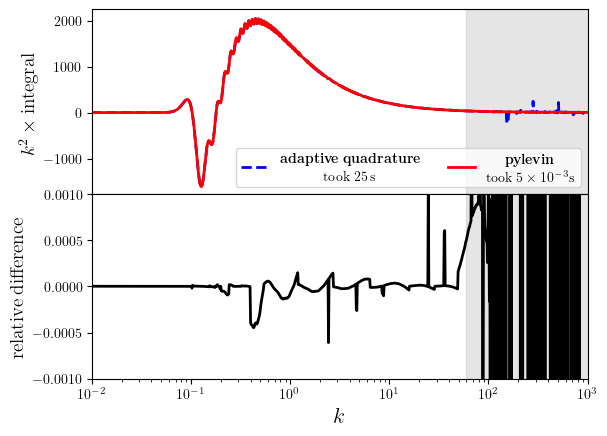

In [10]:
import matplotlib as mpl

fontsi = 20
fontsi2 = 20


fig, ax = plt.subplots(2)
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('image', interpolation='none')
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

ax[0].semilogx(k,quad_result[:,0]*k**2,ls = "--", label = r"$\begin{array}{c}\mathrm{\bf{adaptive\; quadrature}} \\ \mathrm{took\;}25\,\mathrm{s}\end{array}$", color = "blue", lw = 2)
ax[0].semilogx(k,result_levin[:,0]*k**2, ls = "-", label = r"$\begin{array}{c}\mathrm{\bf{pylevin}}  \\ \mathrm{took\;}5\times 10^{-3}\mathrm{s}\end{array}$", color = "red", lw = 2)
ax[0].set_ylabel(r"$k^2 \times\mathrm{integral}$", fontsize = 14)
ax[0].legend(fontsize = 10, loc = 'lower right', ncols = 2, frameon=True)
ax[0].set_ylim(1.1*np.min(result_levin[:,0]*k**2),1.1*np.max(result_levin[:,0]*k**2))
ax[0].set_xlim(k[0],k[-1])
ax[0].set_xticks([])
ax[0].axvspan(60, k[-1], color='grey', alpha=0.2)


ax[1].semilogx(k, (quad_result[:,0] - result_levin[:,0])/result_levin[:,0], color = "black", lw = 2)
ax[1].set_xlabel(r"$k$", fontsize = 16)
ax[1].set_ylabel("$\mathrm{relative\, difference}$", fontsize = 14)
ax[1].set_ylim(-1e-3,1e-3)
ax[1].set_xlim(k[0],k[-1])
ax[1].axvspan(60, k[-1], color='grey', alpha=0.2)

plt.subplots_adjust(wspace=0, hspace=0)

plt.tight_layout()
plt.savefig("paper_plot_two_bessel.pdf")